# Quantum Computing

Quantum computing is an application of quantum mechanics that uses quantum superposition and entanglement to perform computations on data.

Certain types of problems can be solved more quickly than in traditional computers that use transistors and electrons.

While classical computers store data in bits, either **1** or **0**, represented by on or off, quantum computers use qubits, which can be **1** or **0**, or a hybrid of both known as the "superposition".

Unlike classical computers, qubits can be entangled, influencing each other's state, and can be entangled over large distances; this can reduce the complexity of certain problem types, making quantum computers faster than classical computers.

***
## 1. Flipping a Coin

Due to their reliance on quantum phenomena, quantum computers are not deterministic but rather probablistic in nature.

In classical computers, a coin flip can be represented by two outcomes: heads, representing 1, or tails, representing 0.

The probability of getting heads or tails is 50%.

However, in quantum computing, it's not so simple; the outcome isn't limited to 1 or 0, it can have a probability of anything from 0% to 100%.

***
### Binomial Distribution

A binomial distribution is a probability distribution that describes the outcomes of an array of independent binary events.

In the case of the coin flip, each flip has a binary outcome with two possible outcomes: heads or tails, each having a 50% chance.

The binomial distribution will be used to calculate the probability of getting a particular sequence of heads or tails in an array of coin flips.

In [1]:
import numpy as np

np.random.binomial(100, 0.5)

two_coin_flips = np.random.binomial(2, 0.5, 1_000_000)

<AxesSubplot:ylabel='count'>

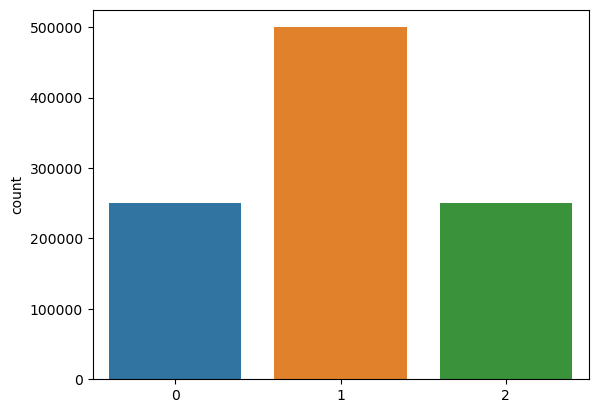

In [2]:
import seaborn as sns
sns.countplot(x=two_coin_flips)

***
## 2. Qiskit

In this notebook, I will be using Qiskit, a library for Python created by IBM, to aid in the creation of quantum circuits. Alternatives do exist; Cirq is similar in functionality and was created by Google.

In [3]:
try:
    # Try and import qiskit
    import qiskit
except ImportError:
    # If it doesn't import, install qiskit using pip
    !pip install qiskit

***
## 3. Qubit

A qubit short for quantum bit, analogue to a bit in classical computers,<br>
the fundamental medium for how information is transmitted in the quantum world.

When the polarisation is absolute its either 0 or 1.

$|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$
$|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

### Superposition

Alternatively, the qubit can be in a state of both 0 and 1 this is
referred to as the quantum superposition.

They are commonly visually depicted as "bloc spheres" (as shown below)
with the north poles representing and absolute 0 and south representing 1.

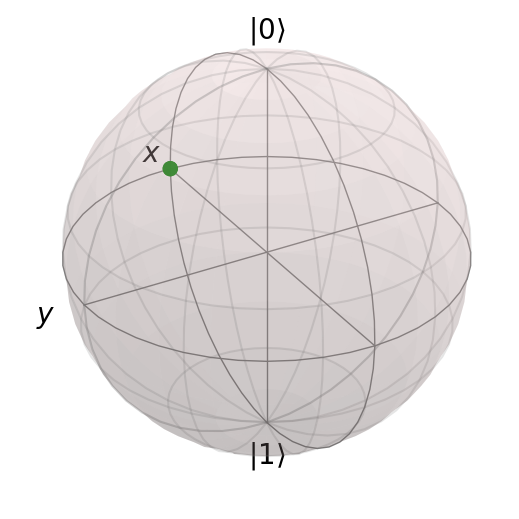

In [4]:
# Uncomment this line if you haven't qutip installed
# !pip install qutip

import qutip
import matplotlib.pyplot as plt

b = qutip.Bloch()
b.point_color = ['g']
b.point_marker = ['o']
b.point_size = [100]
b.view = [60, 30]

# Position of point on sphere
b.add_points([1, 0, 0])
b.show()

***
## 4. Quantum Logic Gates

Similar to logic gates in classical computers, quantum logic gates are used to manipulate the state of the qubits.

Unlike classical computers, all quantum logic gates perform **unitary operations**, below I will describe each gate, and the matrix operations each represent.

### Kronecker Product

***
### Identity Gate

The identity gate leaves the state of the qubit unchanged. It does not perform any actions on the qubit.

$
Identity =
\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
$

### Pauli X Gate / NOT Gate

The Pauli X gate also commonly known as the NOT gate,
performs a NOT operation, flipping the state of the qubit


$|0\rangle => |1\rangle$ and $|1\rangle => |0\rangle$

$
X =
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$

### Pauli Y gate

The Pauli Y gate, rotates the state of qubit by $\pi$ radians around the Y axis, which is equivalent to a 360 degree turn.

$
Y =
\begin{bmatrix} 0 & -i \\ -i & 0 \end{bmatrix}
$

### Pauli Z Gate

The Pauli Z gate, rotates the state of qubit by $\pi$ radians around the Z axis, which is equivalent to a 360 degree turn.

$
Z =
\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$

### Hadamard Gate

If you apply the Hadamard gate to a qubit, it will be put into a superposition state with equal probabilities of measuring 0 and 1 when measured. This means that there is a 50% chance of measuring 0 and a 50% chance of measuring a 1.

$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$

## CNOT Gate

The controlled NOT gate is a quantum gate that flips the state of the second qubit (see NOT gate above), but only if the first qubit is in the $|1\rangle$ state. The controlled NOT gate is also known as the CNOT gate.

$
CNOT =
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}
$

## SWAP Gate

The SWAP gate is a three-qubit quantum gate that exchanges the states of qubits 1 and 2, while leaving qubit 3 unchanged.

$
SWAP =
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}
$

# 5. Quantum Circuit

With qiskit, you describe the quantum circuits in Python; these can then be converted into a form that can be run on an actual quantum computer or in the Aer simulator, but this lacks the quantum uncertainty that actual quantum computers have.

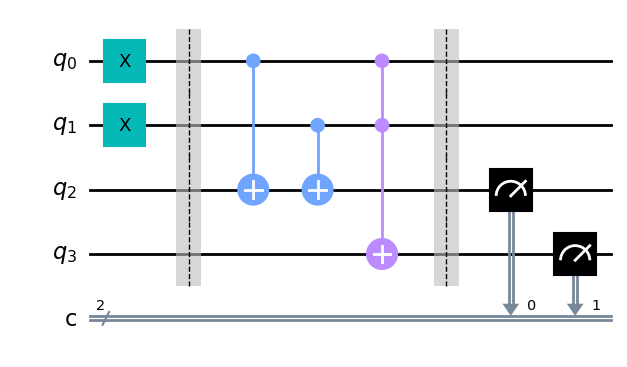

In [5]:
circuit_1 = qiskit.QuantumCircuit(4, 2)

# The inputs will be qubits 0 and 1
circuit_1.x((0, 1))
circuit_1.barrier()

# Add Cx logic gate XOR 0 and 1 and put output into 2
circuit_1.cx(0, 2)
circuit_1.cx(1, 2)

# Add Ccx logic gate AND 0 and 1 and put output into 3
circuit_1.ccx(0, 1, 3)
circuit_1.barrier()

# Measure output
circuit_1.measure(2, 0) # extract XOR value
circuit_1.measure(3, 1) # extract AND value

circuit_1.draw(output="mpl")

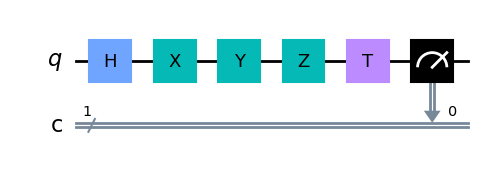

In [6]:
# Quantum circuit 1 quantum and 1 classical bit
circuit_2 = qiskit.QuantumCircuit(1, 1)

# 1 h, z, y, z, t gates
circuit_2.h(0)
circuit_2.x(0)
circuit_2.y(0)
circuit_2.z(0)
circuit_2.t(0)

circuit_2.measure(0, 0)

circuit_2.draw(output="mpl")

### Aer Simulator

In [7]:
aer_sim = qiskit.Aer.get_backend('aer_simulator')
result = aer_sim.run(circuit_1).result().get_counts()

***
## 6. Deutsch’s Algorithm

Deutsch's algorithm is a quantum algorithm designed by David Deutsch in 1985, it shows how quantum computers are superior to classical computers

### Classical Approach

In [8]:
# Exercise
# Adapt random_f to generate a random function that is either constant or balanced

def is_const_or_balanced(mappings):
    """
    Check if a table of mappings is constant or balanced.
    A constant function has only one possible output value.
    A balanced function has the same number of 0 values as 1 values.
    """
    num_output_values = len(set(mappings.values()))
    
    output_values = [*mappings.values()]
    output_zero_count = output_values.count(0)
    output_one_count = output_values.count(1)

    return num_output_values == 1 or output_one_count == output_zero_count

In [9]:
import random
import itertools

def convert_val_to_bit_tuple(val, bits_count):
    """ Convert an integer into a bit tuple equivalent """

    # Bit tuples is only for multiple bits
    if bits_count == 1: return val
    
    # Convert an integer into a tuple containing its bits
    # Iterate through all bits, extract bit status using AND, put into tuple
    return tuple((val & (1 << i)) >> i for i in reversed(range(bits_count)))

def random_f(bits_count=1):
    """
    bits_count is the number of input bits in the input for the function
    This function returns a random function that is either constant or balanced
    """
    max_num = (1 << bits_count)
    io_mappings = [*itertools.product([0, 1], repeat=max_num)]
    
    while True: # Loop until we find a function that is constant or balanced
        random_func = random.choice(io_mappings)
        
        # Convert tuples to dict
        random_func = {convert_val_to_bit_tuple(i, bits_count): el for i, el in enumerate(random_func)}
        
        if is_const_or_balanced(random_func):
            return lambda x: random_func[x]

#### Testing random_f Function

In [10]:
f = random_f(1)
print(f"Test for 1 bit")
for input_tup in [0, 1]:
    output_bit = f(input_tup)
    print(f"f({input_tup}) = ", output_bit)

for bit_count in [2, 3]:
    # Test for i input bits
    f = random_f(bit_count)
    print(f"Test for {bit_count} bit(s)")
    for input_tup in [*itertools.product([0, 1], repeat=bit_count)]:
        output_bit = f(input_tup)
        print(f"f({input_tup}) = ", output_bit)

Test for 1 bit
f(0) =  0
f(1) =  0
Test for 2 bit(s)
f((0, 0)) =  0
f((0, 1)) =  1
f((1, 0)) =  0
f((1, 1)) =  1
Test for 3 bit(s)
f((0, 0, 0)) =  0
f((0, 0, 1)) =  1
f((0, 1, 0)) =  1
f((0, 1, 1)) =  0
f((1, 0, 0)) =  0
f((1, 0, 1)) =  1
f((1, 1, 0)) =  0
f((1, 1, 1)) =  1


### Determining if a Function is Balanced

In [11]:
def is_func_balanced(func, number_of_bits):
    # Generate possible inputs
    inputs = [convert_val_to_bit_tuple(i, number_of_bits) for i in range(1 << number_of_bits)]
    outputs = [func(i) for i in inputs]
    
    # If the amount of possible outputs is half 0's and half 1's
    # It can be said the function is balanced
    return outputs.count(0) == outputs.count(1)

number_of_bits = 2
f2 = random_f(number_of_bits)
is_func_balanced(f2, number_of_bits)

True

### Implementing Deutsch's Algorithm in Qiskit

#### Entry Circuit
The purpose of the entry circuit in Deutsch's algorithms is to prepare the input qubits, by putting them into a specific state, that is required by the rest of the algorithm.

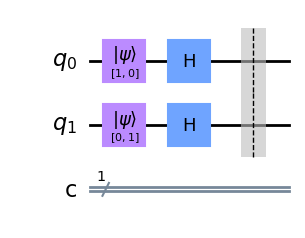

In [12]:
entry_circuit = qiskit.QuantumCircuit(2, 1) # 2 qubits and 1 classical

# Initialise qubit 0 with the state (1, 0)
entry_circuit.initialize((1, 0), 0)

# Initialise qubit 0 with the state (0, 1)
entry_circuit.initialize((0, 1), 1)

# Apply Hadamard gate to qubit 0 and 1
# putting them into a superposition
entry_circuit.h((0, 1))

entry_circuit.barrier()
entry_circuit.draw(output='mpl')

#### Exit Circuit
The purpose of the exit circuit in Deutsch's algorithms is to measure the output qubit, and then you can determine if the oracle function is balanced or constant.

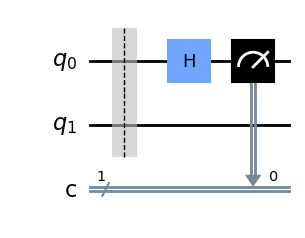

In [13]:
exit_circuit = qiskit.QuantumCircuit(2, 1)  # 2 qubits and 1 classical

exit_circuit.barrier()

# Apply Hadamard gate to qubit 0
# putting it into a superposition
exit_circuit.h(0)

exit_circuit.measure(0, 0)
exit_circuit.draw(output="mpl")

***
### Quantum Circuit Oracles
Deutsch's algorithm can be used to determine whether a function is balanced or constant. However, because this function must be implemented as a quantum circuit, the python functions I generated earlier are not suitable and a quantum circuit must be used instead.

An oracle is another term for a black box; you can't see the internal operations of a black box, but you can pass in inputs and see its outputs, to try and determine what it is doing.

During the development of these oracles I've used Ian McLoughlins, `05-quantum-computing.ipynb` notebook as reference.

***
#### Constant Zero Function

This function/circuit is constant and will always output a zero, regardless of the input.
You will find the quantum circuit below which uses the identity gate.

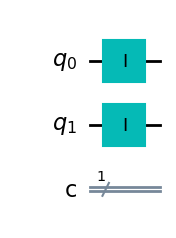

In [14]:
constant_zero_f = qiskit.QuantumCircuit(2, 1) # Two qubits, 1 classical
constant_zero_f.i((0, 1)) # Apply identity to qubits 0 and 1
constant_zero_f.draw(output="mpl")

$f$ = constant_zero_f<br>
$f$(0) = 0 and $f$(1) = 0

***
#### Constant One Function

This function/circuit is constant and will always output a one, regardless of the input.
You will find the quantum circuit below which uses the identity gate.

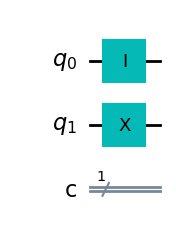

In [15]:
constant_one_f = qiskit.QuantumCircuit(2, 1) # Two qubits, 1 classical
constant_one_f.i(0) # Apply identity to qubits 0
constant_one_f.x(1) # Apply x gate to qubit 1
constant_one_f.draw(output="mpl")

***
### Balanced Identity Function

This function/circuit is balanced and will always return the input qubit.
You will find the quantum circuit below which uses the identity gate.

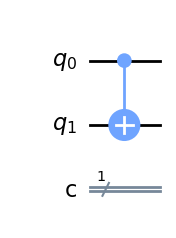

In [16]:
balanced_identity_f = qiskit.QuantumCircuit(2, 1) # Two qubits, 1 classical
balanced_identity_f.cnot(0, 1) # Apply controlled not to qubits 0 and 1
balanced_identity_f.draw(output="mpl")

$f$ = balanced_identity_f<br>
$f$(0) = 0 and $f$(1) = 1

***
### Balanced Not Function

This function/circuit is balanced and will always return the opposite of the input qubit.
You will find the quantum circuit below which uses the identity gate.

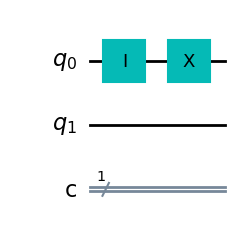

In [17]:
balanced_not_f = qiskit.QuantumCircuit(2, 1) # Two qubits, 1 classical
balanced_not_f.i(0) # Apply identity to qubit 0
balanced_not_f.x(0) # Apply Pauli X to qubit 1
balanced_identity_f.cnot(0, 1) # Apply controlled not to qubits 0 and 1
balanced_not_f.draw(output="mpl")

$f$ = balanced_not_f<br>
$f$(0) = 1 and $f$(1) = 0

***
### Determining if an Oracle/Function is Balanced

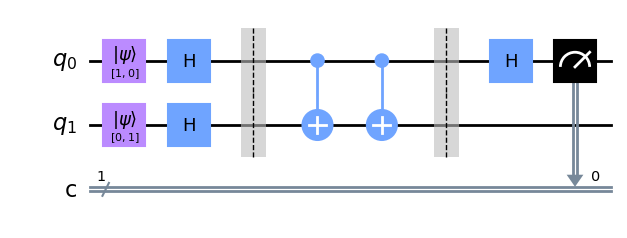

In [18]:
# List of all oracles from above
oracle_list = [
    constant_zero_f, constant_one_f,
    balanced_identity_f, balanced_not_f
]

# Pick a random from the list
random_oracle = random.choice(oracle_list)

def append_circuits(circuit_list):
    """ Since the __add__ method is deprecated
    This function will append a list of circuits together """
    import functools
    compose_func = lambda i, j: i.compose(j)
    
    # Perform reduce operation, execute .compose on each circuit
    return functools.reduce(compose_func, circuit_list)

# Adding the entry circuit, the random oracle thats either balanced or constant
# and the exit circuit
complete_deutsch_circuit = append_circuits([entry_circuit, random_oracle, exit_circuit])
complete_deutsch_circuit.draw(output="mpl")

In [19]:
aer_simulator = qiskit.Aer.get_backend("aer_simulator")

print(result := aer_simulator.run(complete_deutsch_circuit).result().get_counts())

{'0': 1024}


In [20]:
if '1' in result: print("Balanced function")
else: print("Constant function")

Constant function


### Testing constant_zero_f
The oracle constant_zero_f should always return constant.

In [21]:
complete_deutsch_circuit = append_circuits([entry_circuit, constant_zero_f, exit_circuit])

aer_sim = qiskit.Aer.get_backend('aer_simulator')
result = aer_sim.run(complete_deutsch_circuit).result().get_counts()

if '1' in result: print("Failure")
else: print("Works successfully")

Works successfully


***
## References
* https://github.com/ianmcloughlin/2223-S1-emerging-technologies/blob/main/notebooks/05-quantum-computing.ipynb<br>
* https://quantum-computing.ibm.com/composer/docs/iqx/guide/the-qubit<br>
* https://learn.microsoft.com/en-us/azure/quantum/concepts-the-qubit<br>
* https://en.wikipedia.org/wiki/Quantum_logic_gate<br>